Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



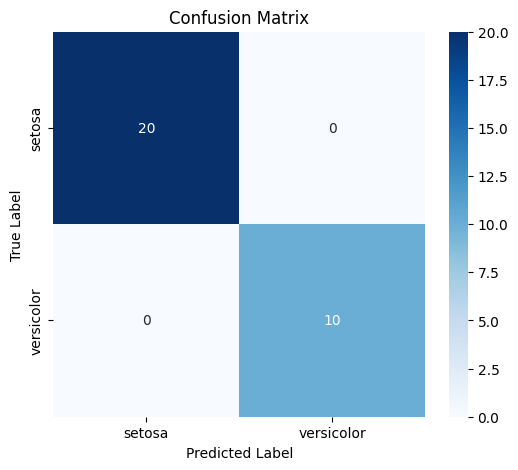

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import seaborn as sns

# Step 1: Define the Gradient Boosting Class
class GradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.init_predictor = None

    def fit(self, X, y):
        # Step 2: Initialize the model with a constant value (mean of target)
        y_pred = np.mean(y)  # Initialize with the mean of the target
        self.init_predictor = y_pred
        y_pred_initial = np.full_like(y, y_pred, dtype=np.float32)

        # Gradient boosting: iterate over n_estimators
        for _ in range(self.n_estimators):
            # Step 3: Compute residuals (negative gradient of the loss function)
            residuals = y - y_pred_initial

            # Step 4: Fit a decision tree to the residuals
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)

            # Step 5: Predict residuals from the tree and update the model
            tree_pred = tree.predict(X)
            y_pred_initial += self.learning_rate * tree_pred

            # Store the tree for later predictions
            self.trees.append(tree)

    def predict(self, X):
        # Predicting with the final model
        y_pred = np.full((X.shape[0],), self.init_predictor, dtype=np.float32)
        
        # Add predictions from each tree
        for tree in self.trees:
            tree_pred = tree.predict(X)
            y_pred += self.learning_rate * tree_pred
        
        return y_pred


# Load dataset (Iris dataset for simplicity)
data = load_iris()
X = data.data
y = (data.target == 0).astype(int)  # Binary classification (class 0 vs other)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
gb = GradientBoosting(n_estimators=100, learning_rate=0.1, max_depth=3)
gb.fit(X_train, y_train)

# Predict on the test set
y_pred = gb.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred > 0.5))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred > 0.5)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names[:2], yticklabels=data.target_names[:2])
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

